In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from altair import Chart, X, Y, Scale
dirs = ['./output/2017-10-05/']
# os.listdir('output/2017-09-12')

In [74]:
dfs = []
for dir in dirs:
    dfs += [pd.read_csv(dir + filename)
           for filename in os.listdir(dir)]
df = pd.concat(dfs)
df['epoch_time'] = df['train_time'] / df['epoch']
df.columns

Index(['Unnamed: 0', 'approx_grad', 'augment', 'batch_size', 'dataset',
       'droprate', 'epoch', 'epochs', 'feed_forward_compute_time',
       'grad_compute_time', 'layers', 'loss_compute_time', 'lr', 'momentum',
       'n_bytes', 'name', 'nesterov', 'num_workers', 'print_freq', 'resume',
       'seed', 'start_epoch', 'step_compute_time', 'svd_rank', 'tensorboard',
       'test_acc', 'test_loss', 'train_time', 'use_cuda', 'weight_decay',
       'widen_factor', 'epoch_time'],
      dtype='object')

In [80]:
show = df[df.widen_factor == 1]
values = [key + '_compute_time' for key in ['grad', 'step', 'loss',
                                            'feed_forward']]
values = [key + '_compute_time' for key in ['grad', 'step']]#, 'loss',
#                                             'feed_forward']]
# values += ['train_time']
show = show.pivot_table(values=values,
                      index='layers', aggfunc=np.min)
show.tail()

,grad_compute_time,step_compute_time
layers,,
94,26.605536,24.888919
100,29.426715,34.583807
106,32.241532,44.474930
112,34.918894,54.763761
118,37.783479,60.498271


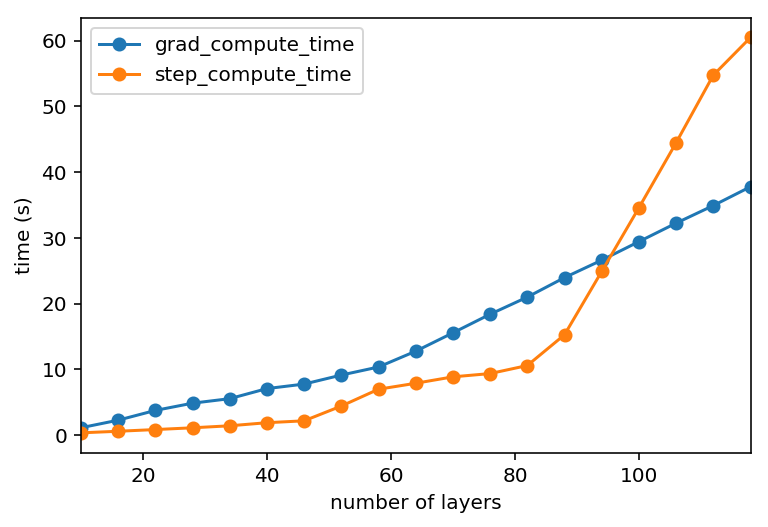

In [81]:
log = False
show.plot(logy=log, logx=log, style='o-')
plt.ylabel('time (s)')
plt.xlabel('number of layers')